In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Link do folderu z kodem:
https://aghedupl-my.sharepoint.com/my?id=%2Fpersonal%2Fdracz%5Fstudent%5Fagh%5Fedu%5Fpl%2FDocuments%2FUczenie%20Maszynowe%2FUczenie%20nadzorowane%20%2D%20predykcja

In [59]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD', 'TAX', "PTRATIO", 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.data.txt', delimiter = r'\s+', names = names)

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Opis zmiennych
- CRIM - wskaźnik przestępczości na mieszkańca (ilość zgłoszonych przestępstw podzielona przez ilość mieszkańców miasta)
- ZN - odsetek gruntów pod zabudowę mieszkaniową o powierzchni powyżej 25 000 stóp kwadratowych
- INDUS - odsetek biznesów niezajmujących się handlem detalicznym dla miasta
- CHAS - 1 jeżeli leży nad rzeką Charles; 0 - jeśli nie
- NOX - koncentracja tlenków azotu (ilość części na 10 milionów)
- RM - średnia ilość pokoi mieszkalnych
- AGE - odsetek budynków, zamieszkanych przez właścicieli, wybudowanych przed 1940 r.
- DIS - zważone odległości od pięciu dużych centrów zatrudnienia
- RAD - indeks dostępności do dróg radialnych
- TAX - pełna stawka podatku od nieruchomości na \$10,000
- PTRATIO - stosunek ilości uczniów do ilości nauczycieli dla miasta
- B - $1000(B_k - 0.63)^2$, gdzie $B_k$ to odsetek czarnoskórych mieszkańców
- LSTAT - % ludności o niższym statusie
- MEDV - mediana cen mieszkań zajętych przez właścicieli (w tysiącach dolarów)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Eksploracyjna analiza danych

### Ilość wartości brakujących

In [4]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

W zbiorze danych nie występują żadne wartości brakujące

### Statystyki opisowe

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Ilość wartości unikalnych w całym zbiorze danych

In [6]:
print(f"Ilość rekordów: {len(data)}")
for name in names:
    print(f"Ilość unikalnych wartości dla zmiennej {name}: {len(data[name].unique())}")

Ilość rekordów: 506
Ilość unikalnych wartości dla zmiennej CRIM: 504
Ilość unikalnych wartości dla zmiennej ZN: 26
Ilość unikalnych wartości dla zmiennej INDUS: 76
Ilość unikalnych wartości dla zmiennej CHAS: 2
Ilość unikalnych wartości dla zmiennej NOX: 81
Ilość unikalnych wartości dla zmiennej RM: 446
Ilość unikalnych wartości dla zmiennej AGE: 356
Ilość unikalnych wartości dla zmiennej DIS: 412
Ilość unikalnych wartości dla zmiennej RAD: 9
Ilość unikalnych wartości dla zmiennej TAX: 66
Ilość unikalnych wartości dla zmiennej PTRATIO: 46
Ilość unikalnych wartości dla zmiennej B: 357
Ilość unikalnych wartości dla zmiennej LSTAT: 455
Ilość unikalnych wartości dla zmiennej MEDV: 229


Zmienne, które mają wyraźnie mniejszą ilość wartości unikalnych:
- ZN
- CHAS
- RAD

Zmienne te są zmiennymi kategorycznymi, co widać na poniższych wykresach:

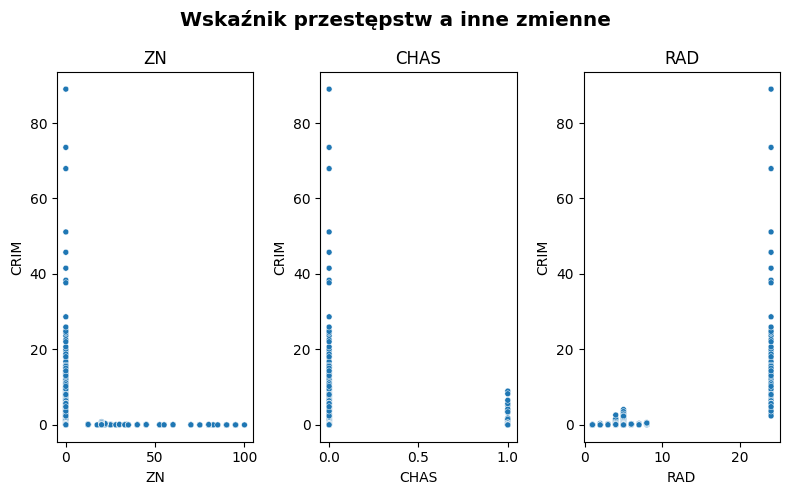

In [7]:
fig, axes = plt.subplots(1, 3, figsize = (8,5), facecolor = 'white')

fig.suptitle("Wskaźnik przestępstw a inne zmienne", fontsize = 'x-large', fontweight = 'bold')

names1 = ['ZN', 'CHAS', 'RAD']

for i in range(3):
    sns.scatterplot(data = data, x = names1[i], y = 'CRIM', size = 1, ax = axes[i], legend = False)
    axes[i].set_title(names1[i])

plt.tight_layout()

Zmiennych tych (np. CHAS) można użyć, żeby według nich pogrupować inne zmienne.

### Badanie rozkładu zmiennych

Wybrane zmienne zostaną przedstawione na histogramach (z dodaniem jądrowego estymatora gęstości), a także na innych typach wykresów celem zbadania ich rozkładu.

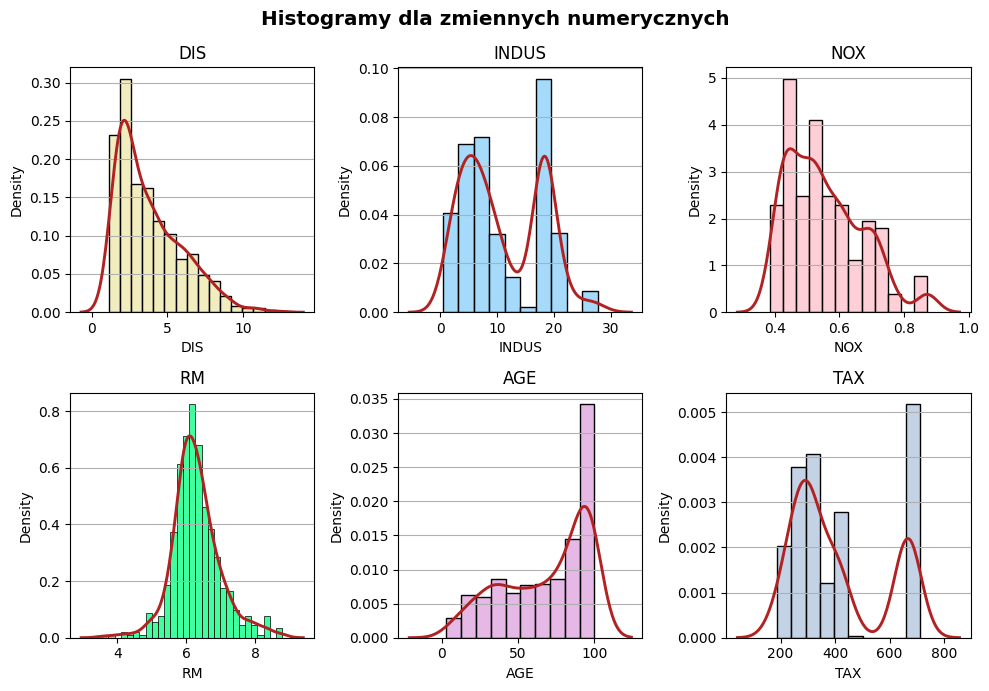

In [58]:
fig, axes = plt.subplots(2, 3, figsize = (10, 7), facecolor = 'white')

names2 = np.array(['DIS', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX']).reshape(2,3)

fig.suptitle("Histogramy dla zmiennych numerycznych", fontsize = 'x-large', fontweight = 'bold')

colors = np.array(["palegoldenrod", "lightskyblue", "pink", "springgreen", "plum", "lightsteelblue"]).reshape(2,3)

for i in range(2):
    for j in range(3):
        axes[i,j].grid(visible = True, axis = 'y')
        sns.histplot(data = data[names2[i,j]], ax = axes[i,j], color = colors[i,j], stat = "density")
        sns.kdeplot(data = data[names2[i,j]], color = "firebrick", ax = axes[i,j], linewidth = 2.1)
        axes[i,j].set_title(names2[i,j])
        

plt.tight_layout()

Rozkłady są skośne (z wyjątkiem RM, który jest prawie symetryczny). Dla zmiennych INDUS i TAX można zaobserwować bimodalność.

Wykresy boxplot (zaznaczona na nich również wartość średnia znakiem x):

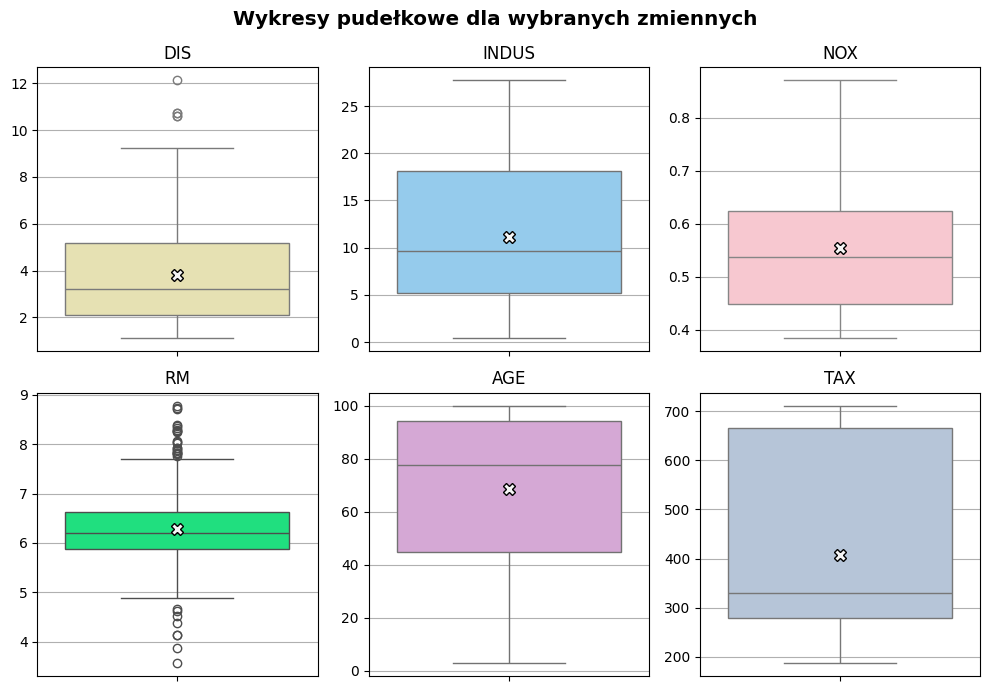

In [79]:
fig, axes = plt.subplots(2, 3, figsize = (10, 7), facecolor = 'white')

fig.suptitle("Wykresy pudełkowe dla wybranych zmiennych", fontsize = 'x-large', fontweight = 'bold')

for i in range(2):
    for j in range(3):
        axes[i,j].grid(visible = True, axis = 'y')
        sns.boxplot(data = data[names2[i,j]], ax = axes[i,j], color = colors[i,j], showmeans = True, meanprops = {'marker' : 'X', 'markeredgecolor' : 'black', 
                                                                                                                   'markerfacecolor' : "whitesmoke", 'markersize' : 9})
        axes[i,j].set_title(names2[i,j])
        axes[i,j].yaxis.label.set_visible(False)

plt.tight_layout()

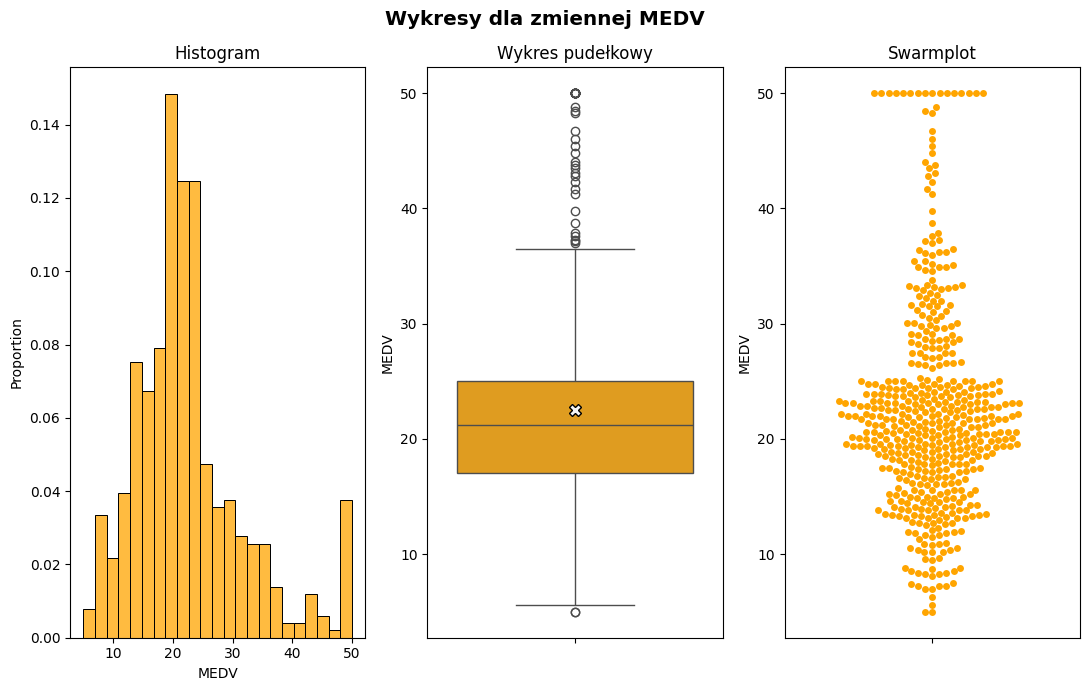

In [80]:
fig, axes = plt.subplots(1, 3, figsize = (11,7), facecolor = 'white')

fig.suptitle("Wykresy dla zmiennej MEDV", fontsize = "x-large", fontweight = 'bold')

sns.histplot(data = data['MEDV'], ax = axes[0], color = 'orange', stat = 'proportion')
axes[0].set_title("Histogram")

sns.boxplot(data = data['MEDV'], ax = axes[1], color = 'orange', showmeans = True, meanprops = {'marker' : 'X', 'markeredgecolor' : 'black', 
                                                                                               'markerfacecolor' : 'whitesmoke', 'markersize' : 9})
axes[1].set_title("Wykres pudełkowy")

sns.swarmplot(data = data['MEDV'], ax = axes[2], color = 'orange')
axes[2].set_title("Swarmplot")

plt.tight_layout()

### Badanie zależności między wybranymi zmiennymi

Celem zbadania zależności, w pierwszym kroku można zwizualizować macierz korelacji, która pozwoli ocenić liniowe zależności między zmiennymi:

Text(0.5, 1.0, 'Macierz korelacji')

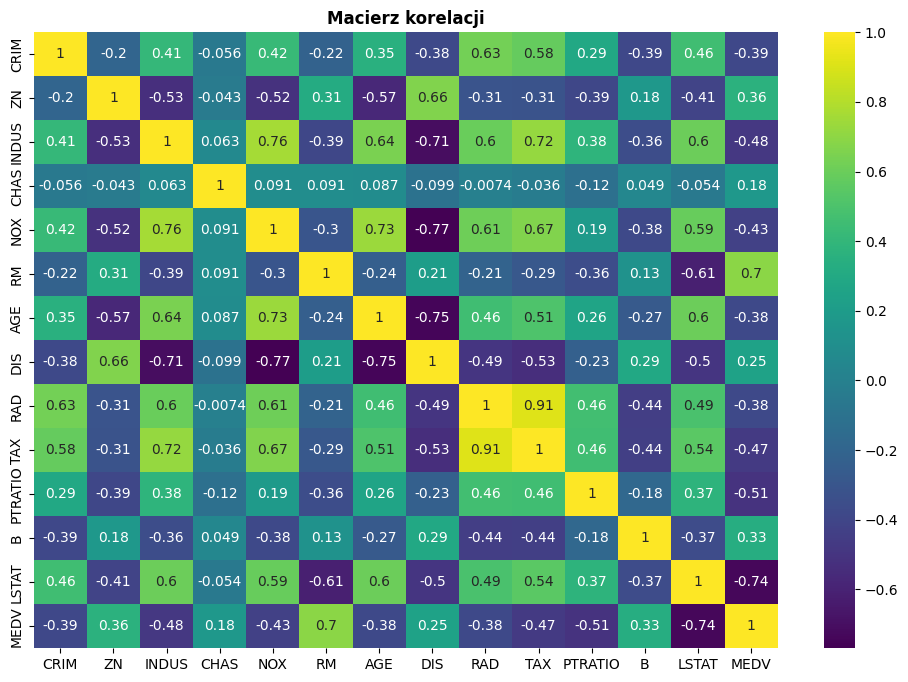

In [74]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8), facecolor = 'white')

sns.heatmap(data.corr(), annot = True, cbar = True, cmap = 'viridis', ax = ax)
ax.set_title("Macierz korelacji", fontweight = "bold")

Poniżej w celu przeglądowym przedstawione zostały również relacje między wybranymi parami zmiennych:

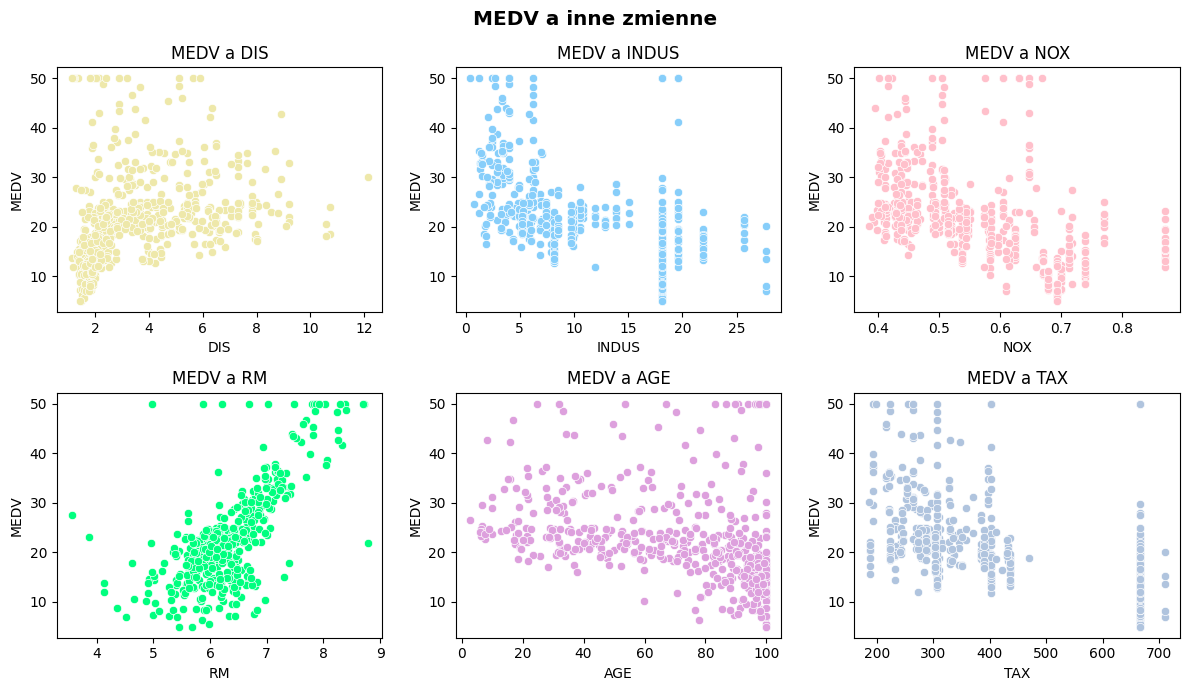

In [66]:
fig, axes = plt.subplots(2, 3, figsize = (12,7), facecolor = 'white')

fig.suptitle("MEDV a inne zmienne", fontsize = "x-large", fontweight = 'bold')

for i in range(2):
    for j in range(3):
        sns.scatterplot(data = data, x = names2[i,j], y = 'MEDV', ax = axes[i,j], color = colors[i,j])
        axes[i,j].set_title(f"MEDV a {names2[i,j]}")

plt.tight_layout()

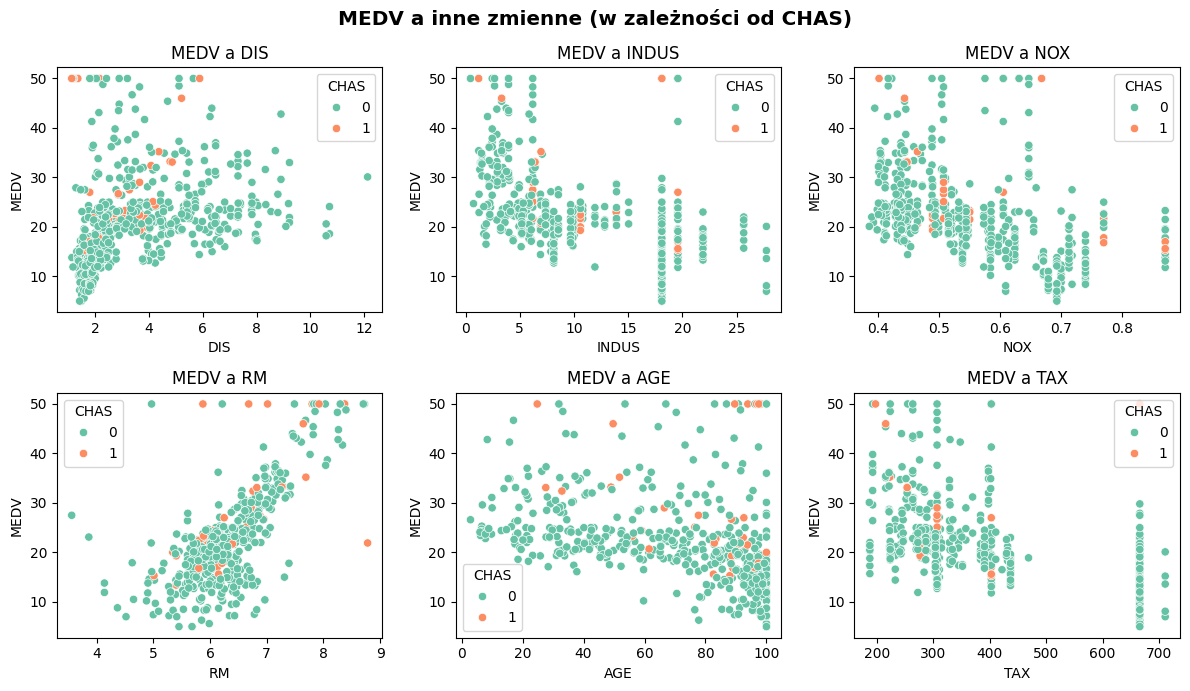

In [156]:
fig, axes = plt.subplots(2, 3, figsize = (12,7), facecolor = 'white')

fig.suptitle("MEDV a inne zmienne (w zależności od CHAS)", fontsize = "x-large", fontweight = 'bold')

for i in range(2):
    for j in range(3):
        sns.scatterplot(data = data, x = names2[i,j], y = 'MEDV', ax = axes[i,j], hue = 'CHAS', palette = 'Set2')
        axes[i,j].set_title(f"MEDV a {names2[i,j]}")

plt.tight_layout()

Można zauważyć, że zmienna CHAS = 1 (miasta leżące nad rzeką), stanowi jedynie niewielką część całego zbioru danych.

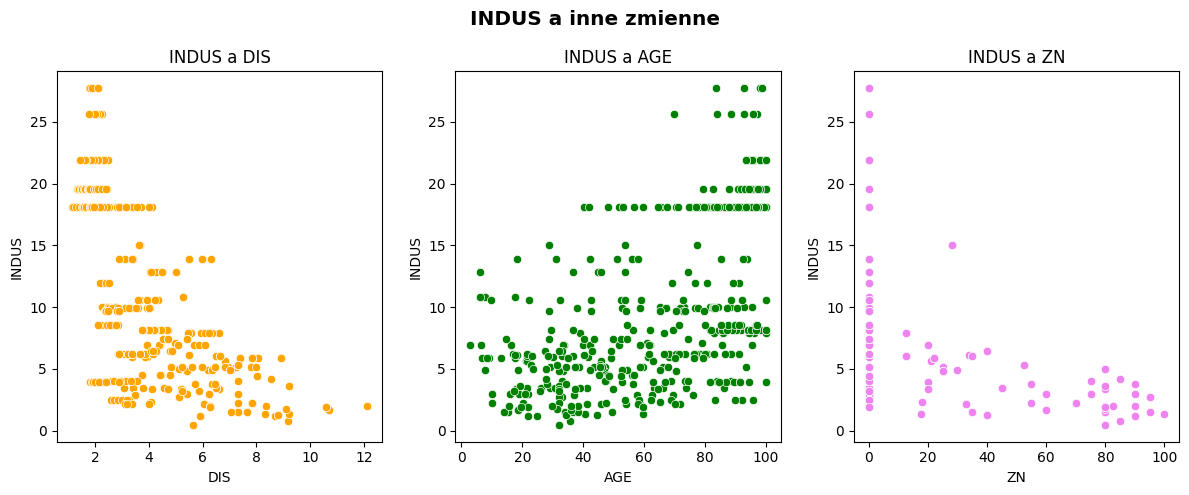

In [128]:
fig, axes = plt.subplots(1, 3, figsize = (12,5), facecolor = 'white')

fig.suptitle("INDUS a inne zmienne", fontsize = "x-large", fontweight = 'bold')

nn = ['DIS', 'AGE', 'ZN']

colors = ['orange', 'green', 'violet']

for i in range(3):
    sns.scatterplot(data = data, x = nn[i], y = 'INDUS', ax = axes[i], color = colors[i])
    axes[i].set_title(f"INDUS a {nn[i]}")


plt.tight_layout()

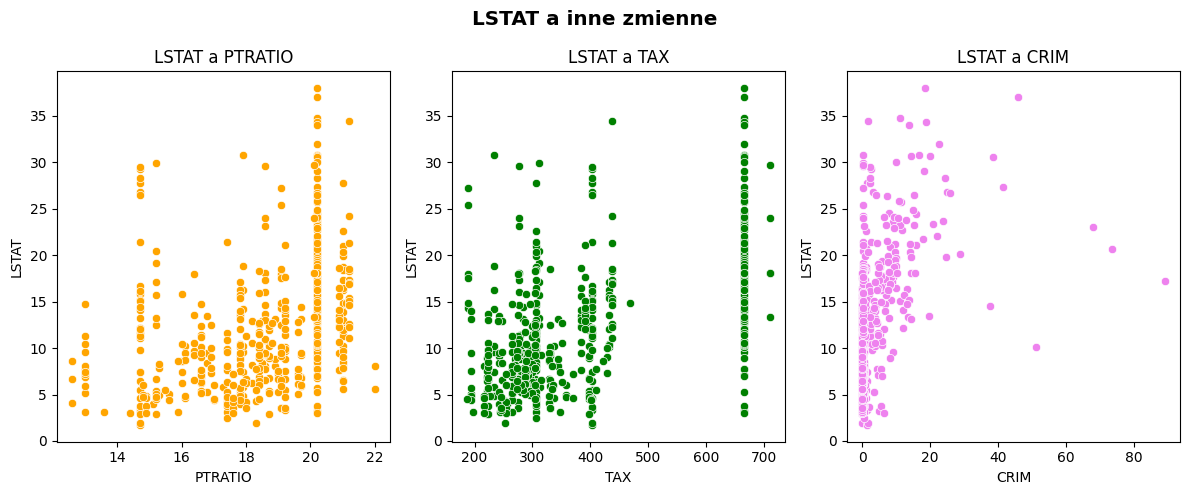

In [129]:
fig, axes = plt.subplots(1, 3, figsize = (12,5), facecolor = 'white')

fig.suptitle("LSTAT a inne zmienne", fontsize = "x-large", fontweight = 'bold')

nn = ['PTRATIO', 'TAX', "CRIM"]

for i in range(3):
    sns.scatterplot(data = data, x = nn[i], y = 'LSTAT', ax = axes[i], color = colors[i])
    axes[i].set_title(f"LSTAT a {nn[i]}")


plt.tight_layout()

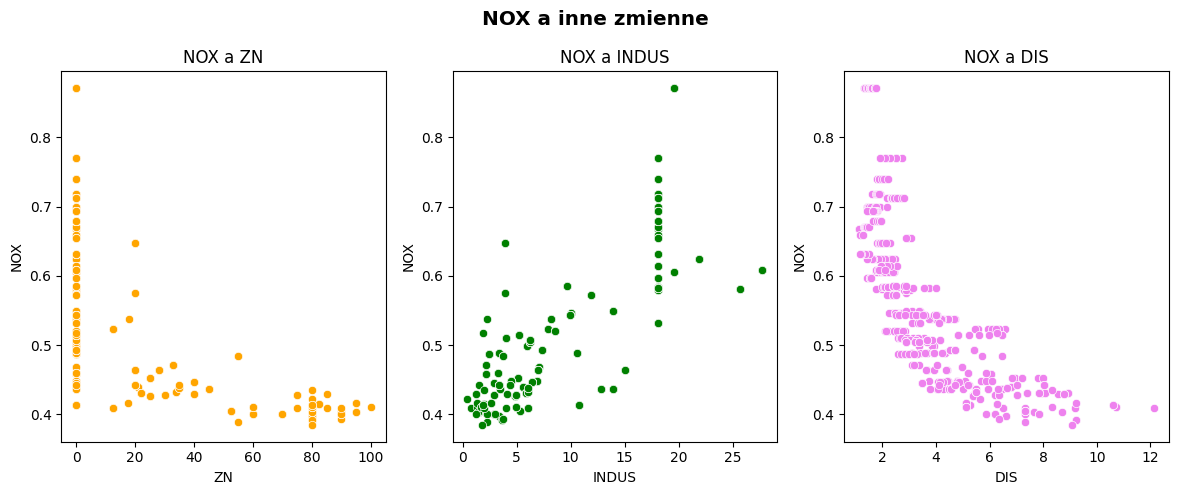

In [130]:
fig, axes = plt.subplots(1, 3, figsize = (12,5), facecolor = 'white')

fig.suptitle("NOX a inne zmienne", fontsize = "x-large", fontweight = 'bold')

nn = ['ZN', 'INDUS', "DIS"]

for i in range(3):
    sns.scatterplot(data = data, x = nn[i], y = 'NOX', ax = axes[i], color = colors[i])
    axes[i].set_title(f"NOX a {nn[i]}")


plt.tight_layout()

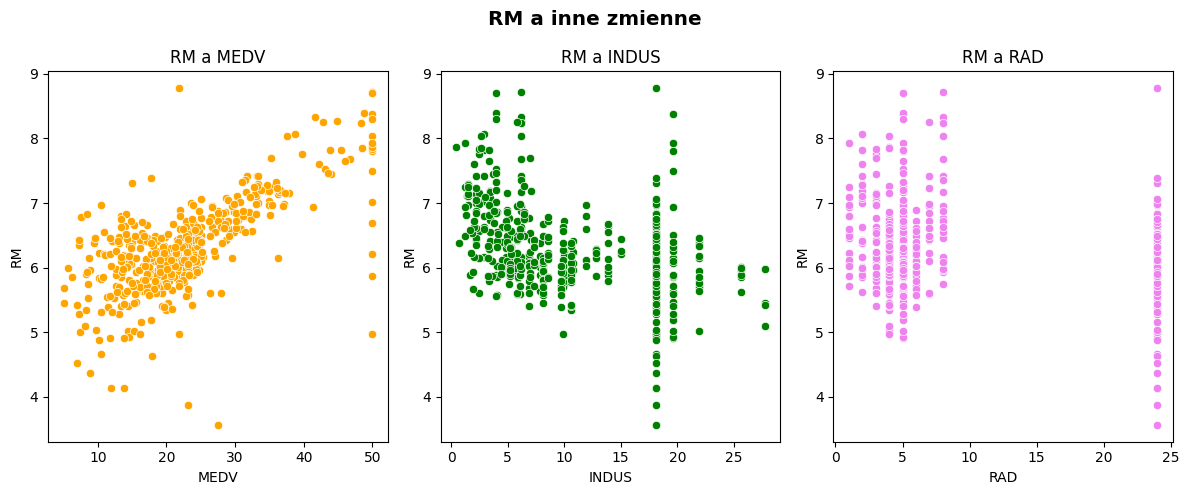

In [131]:
fig, axes = plt.subplots(1, 3, figsize = (12,5), facecolor = 'white')

fig.suptitle("RM a inne zmienne", fontsize = "x-large", fontweight = 'bold')

nn = ['MEDV', 'INDUS', "RAD"]

for i in range(3):
    sns.scatterplot(data = data, x = nn[i], y = 'RM', ax = axes[i], color = colors[i])
    axes[i].set_title(f"RM a {nn[i]}")

plt.tight_layout()

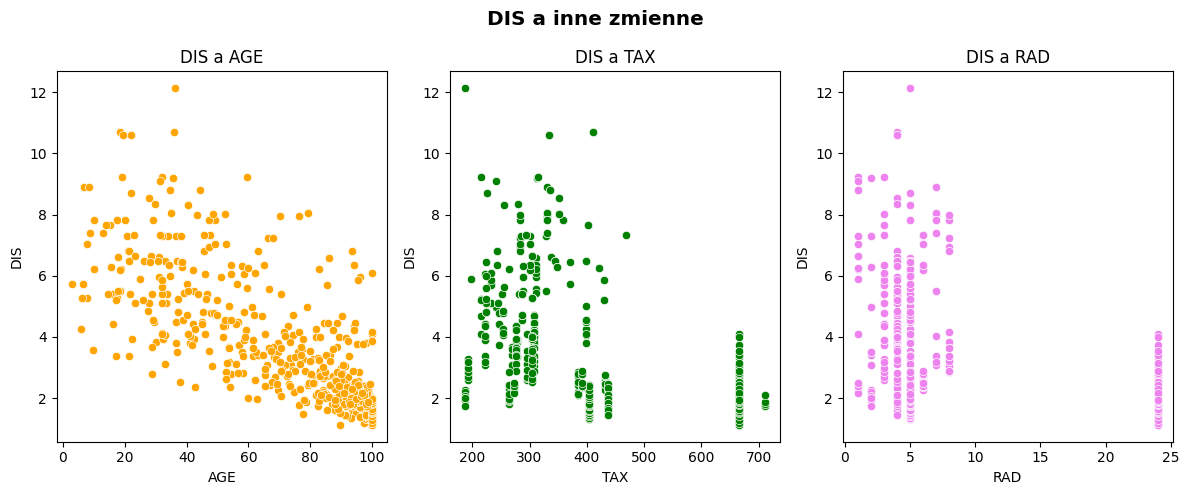

In [132]:
fig, axes = plt.subplots(1, 3, figsize = (12,5), facecolor = 'white')

fig.suptitle("DIS a inne zmienne", fontsize = "x-large", fontweight = 'bold')

nn = ['AGE', 'TAX', "RAD"]

for i in range(3):
    sns.scatterplot(data = data, x = nn[i], y = 'DIS', ax = axes[i], color = colors[i])
    axes[i].set_title(f"DIS a {nn[i]}")

plt.tight_layout()

## Ogólne wnioski ze wstępnej analizy:
- rozkłady danych są niesymetryczne,
- w zbiorze nie ma wartości brakujących, ale dla niektórych zmiennych można zauważyć wartości odstające,
- związki między poszczególnymi zmiennymi nie są zazwyczaj liniowe (wyjątek: np. LSTAT i MEDV), ale między większością można zauważyć znaczącą korelację


## Podział na zbiór treningowy i testowy

In [106]:
X = data.drop("MEDV", axis = 1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [108]:
# regresja liniowa
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [112]:
# XGBoost
xg_reg1 = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree = 0.3, n_estimators = 10, max_depth = 5)

xg_reg1.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10,
             n_jobs=None, num_parallel_tree=None, ...)

In [113]:
from sklearn.model_selection import GridSearchCV

params = {'learning_rate' : [0.01, 0.1, 0.3], 'max_depth' : [3,5,7], 'n_estimators' : [50, 100, 200]}
xg_reg2 = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.3)

grid = GridSearchCV(estimator = xg_reg2, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.3,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

## Ewaluacja modeli

In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

In [125]:
# regresja liniowa
y_pred_lr = lr.predict(X_test)

print("Regresja liniowa\n")
print(f"MSE = {mean_squared_error(y_test, y_pred_lr)}")
print(f"RMSE = {root_mean_squared_error(y_test, y_pred_lr)}")
print(f"MAE = {mean_absolute_error(y_test, y_pred_lr)}")
print(f"R2 = {r2_score(y_test, y_pred_lr)}")

Regresja liniowa

MSE = 18.92465064382449
RMSE = 4.350247193416081
MAE = 3.081907244576049
R2 = 0.7260575002484574


In [126]:
# XGBoost (bez GridSearch)
y_pred_xg1 = xg_reg1.predict(X_test)

print(f"MSE = {mean_squared_error(y_test, y_pred_xg1)}")
print(f"RMSE = {root_mean_squared_error(y_test, y_pred_xg1)}")
print(f"MAE = {mean_absolute_error(y_test, y_pred_xg1)}")
print(f"R2 = {r2_score(y_test, y_pred_xg1)}")

MSE = 15.249609972633426
RMSE = 3.905074899746921
MAE = 2.9630483702117325
R2 = 0.7792553027919453


In [127]:
# XGBoost (GridSearch)
y_pred_grid = grid.predict(X_test)

print("XGBoost - GridSearch\n")
print(f"MSE = {mean_squared_error(y_test, y_pred_grid)}")
print(f"RMSE = {root_mean_squared_error(y_test, y_pred_grid)}")
print(f"MAE = {mean_absolute_error(y_test, y_pred_grid)}")
print(f"R2 = {r2_score(y_test, y_pred_grid)}")

XGBoost - GridSearch

MSE = 7.156309591327898
RMSE = 2.675127957935451
MAE = 1.9412962305779553
R2 = 0.896409324782752


Najlepiej dopasowany model to ten przy użyciu GridSearch

### Założenia dla regresji liniowej

#### Sprawdzenie dla modelu LinearRegression()

In [139]:
vals = data.columns[:-2].values.reshape(4,3)

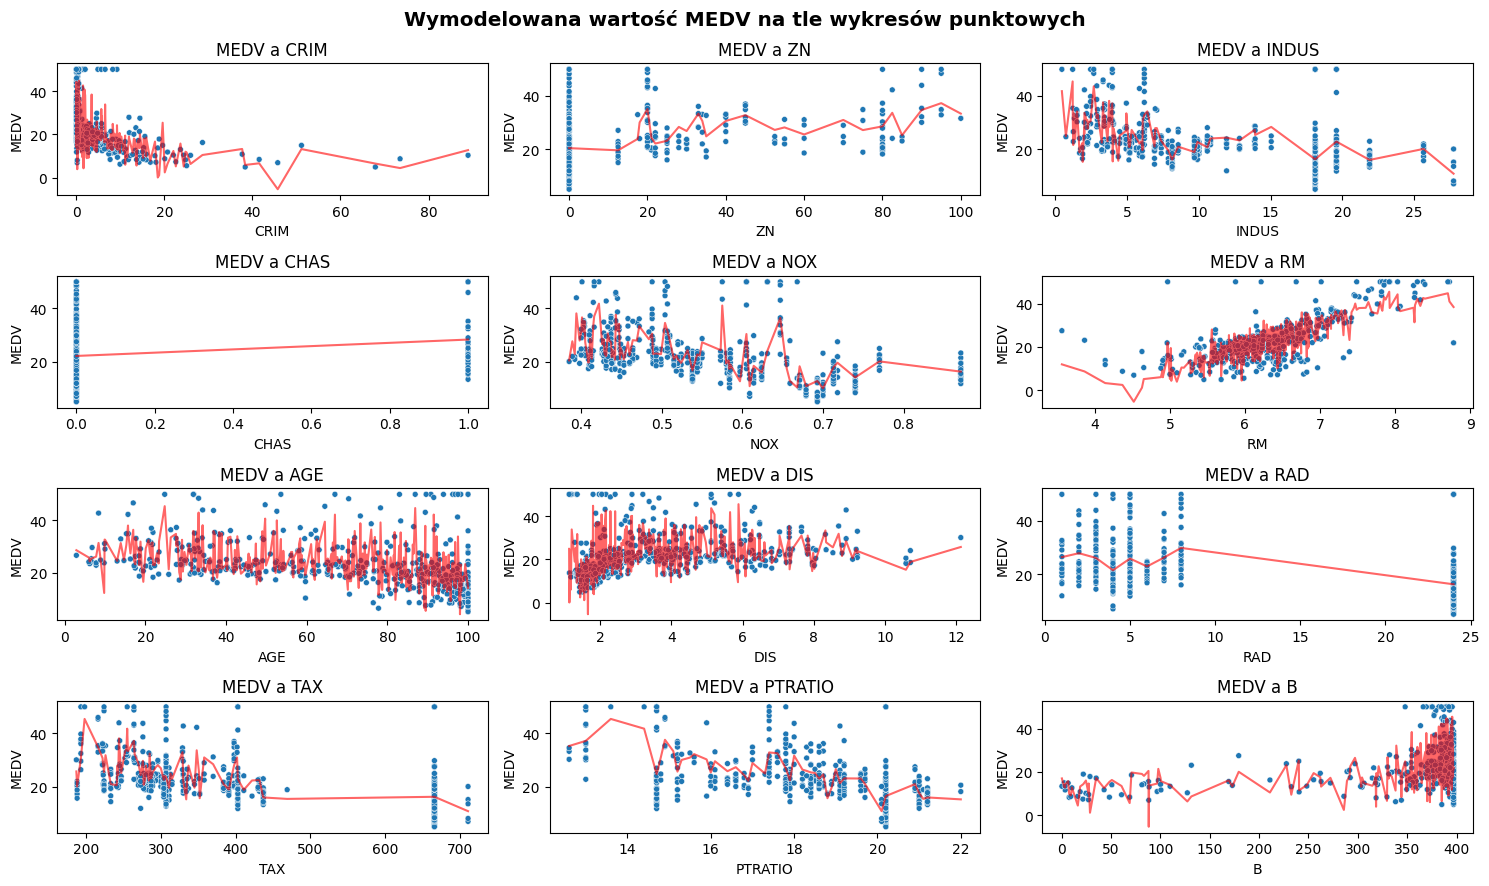

In [148]:
fig, ax = plt.subplots(4, 3, figsize = (15, 9), facecolor = 'white')

fig.suptitle("Wymodelowana wartość MEDV na tle wykresów punktowych", fontsize = "x-large", fontweight = "bold")

yy = lr.predict(X)

for i in range(4):
    for j in range(3):
        sns.lineplot(data = data, x = vals[i,j], y = yy, ax = ax[i,j], color = 'red', alpha = 0.6, errorbar = None)
        sns.scatterplot(data = data, x = vals[i,j], y = 'MEDV', ax = ax[i,j], size = 2.3, legend = False)
        ax[i,j].set_title(f"MEDV a {vals[i,j]}")
plt.tight_layout()

Text(0.5, 1.0, 'MEDV a LSTAT')

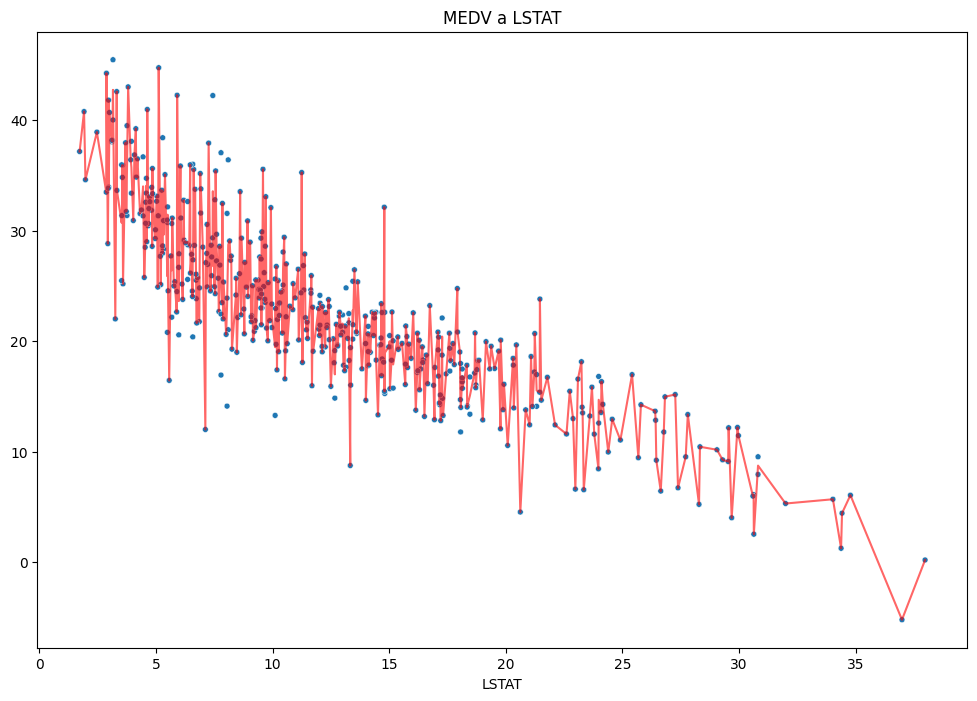

In [147]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8), facecolor = 'white')

sns.lineplot(data = data, x = 'LSTAT', y = yy, ax = ax, color = 'red', alpha = 0.6, errorbar = None)
sns.scatterplot(data = data, x = 'LSTAT', y = yy, ax = ax, size = 2.3, legend = False)
ax.set_title("MEDV a LSTAT")

- Zmienna wyjaśniana jest zmienną ilościową
- Wizualnie można stwierdzić, że homoskedastyczność (stałość wariancji błędu) jest zachowana
- Zmienne wyjaśniające nie są idealnie współliniowe
- Istnieje liniowy związek między zmienną wyjaśnianą a predyktorami

A zatem można stwierdzić, że założenia regresji liniowej są spełnione.